### Context:

* 20:29 Pod activated
* 20:29 basal 1.25 U/hr
* 20:57 temp basal 2.43 U/hr (95% more) - 1 hour duration
* 21.57 basal 1.25 U/hr


In [493]:
import pandas as pd
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import dateutil

def parse(line):
    elems = line.split(' ')
    
    obj = {
        'timestamp': dateutil.parser.parse(elems[0])
    }
    for elem in elems[1:]: 
        (key,v) = elem.split(':')
        obj[key] = v
        
    return obj

def extract_byte(x, index):
    def byte_mapper(x):
        if not isinstance(x, basestring):
            return None
        if len(x) > 0:
            return ord(x.decode('hex')[index])
        else:
            return None
    return x.map(byte_mapper)

lines = open('packets.txt', "rt").readlines()
column_order = ['timestamp', 'ID1', 'PTYPE', 'SEQ', 'ID2', 'CON', 'B9', 'BLEN', 'MTYPE', 'BODY', 'CRC']
packets = pd.DataFrame(map(lambda x: parse(x), lines), columns=column_order).set_index('timestamp')
packets.head(1000)

,ID1,PTYPE,SEQ,ID2,CON,B9,BLEN,MTYPE,BODY,CRC
timestamp,,,,,,,,,,
2016-06-17 20:23:30.966899,1f014829,POD,25,1f014829,NaN,28,10,1d18,02a82800002b7bff8134,45\n
2016-06-17 20:24:44.634776,1f014829,POD,28,1f014829,NaN,30,10,1d18,02a82800002b7fff0360,ea\n
2016-06-17 20:25:53.328967,1f014829,POD,31,1f014829,NaN,38,10,1d18,02a8a800002b87ff037c,f2\n
2016-06-17 20:48:44.551830,1f014829,POD,02,1f014829,NaN,00,10,1d18,02ad2800002bdfff009c,df\n
2016-06-17 20:48:47.828112,1f014829,POD,05,1f014829,NaN,08,10,1d18,02ad2800002bdfff83c5,cf\n
2016-06-17 20:48:49.688761,1f014829,POD,08,1f014829,NaN,10,10,1d18,02ad2800002bdfff014b,92\n
2016-06-17 20:48:51.428896,1f014829,POD,11,1f014829,NaN,1c,10,1d18,02ad2800002bdfff020a,b0\n
2016-06-17 20:50:34.882742,1f014829,POD,14,1f014829,NaN,24,10,1d18,02ada800002be7ff021c,40\n
2016-06-17 20:58:18.403560,1f014829,POD,17,1f014829,NaN,2c,10,1d18,02af2800002c07ff026c,e7\n


In [494]:
# Drop sequential duplicates
packets = packets[packets["SEQ"].shift(-1) != packets["SEQ"]]

packets.head(10)

,ID1,PTYPE,SEQ,ID2,CON,B9,BLEN,MTYPE,BODY,CRC
timestamp,,,,,,,,,,
2016-06-17 20:23:30.966899,1f014829,POD,25,1f014829,NaN,28,10,1d18,02a82800002b7bff8134,45\n
2016-06-17 20:24:44.634776,1f014829,POD,28,1f014829,NaN,30,10,1d18,02a82800002b7fff0360,ea\n
2016-06-17 20:25:53.328967,1f014829,POD,31,1f014829,NaN,38,10,1d18,02a8a800002b87ff037c,f2\n
2016-06-17 20:48:44.551830,1f014829,POD,02,1f014829,NaN,00,10,1d18,02ad2800002bdfff009c,df\n
2016-06-17 20:48:47.828112,1f014829,POD,05,1f014829,NaN,08,10,1d18,02ad2800002bdfff83c5,cf\n
2016-06-17 20:48:49.688761,1f014829,POD,08,1f014829,NaN,10,10,1d18,02ad2800002bdfff014b,92\n
2016-06-17 20:48:51.428896,1f014829,POD,11,1f014829,NaN,1c,10,1d18,02ad2800002bdfff020a,b0\n
2016-06-17 20:50:34.882742,1f014829,POD,14,1f014829,NaN,24,10,1d18,02ada800002be7ff021c,40\n
2016-06-17 20:58:18.403560,1f014829,POD,17,1f014829,NaN,2c,10,1d18,02af2800002c07ff026c,e7\n


### Decode Byte 9

This byte appears to be a 4 bit counter in bits 5:2.  The highest 2 bits and lowest 2 bits are always 0

In [495]:
b9df = packets.copy()
def to_bin(x):
    if len(x) > 0:
        return "{0:b}".format(ord(x.decode('hex')))
    else:
        return ""

def try_val(x):
    if len(x) > 0:
        return ord(x.decode('hex')) >> 2
    else:
        return ""

b9df.drop(['BLEN','CON','CRC','ID1','ID2'], axis=1, inplace=True)
b9df["b9bin"] = b9df["B9"].fillna("").map(to_bin)
b9df["b9_sequence"] = b9df["B9"].fillna("").map(try_val)
b9df.head(20)

,PTYPE,SEQ,B9,MTYPE,BODY,b9bin,b9_sequence
timestamp,,,,,,,
2016-06-17 20:23:30.966899,POD,25,28,1d18,02a82800002b7bff8134,101000,10
2016-06-17 20:24:44.634776,POD,28,30,1d18,02a82800002b7fff0360,110000,12
2016-06-17 20:25:53.328967,POD,31,38,1d18,02a8a800002b87ff037c,111000,14
2016-06-17 20:48:44.551830,POD,02,00,1d18,02ad2800002bdfff009c,0,0
2016-06-17 20:48:47.828112,POD,05,08,1d18,02ad2800002bdfff83c5,1000,2
2016-06-17 20:48:49.688761,POD,08,10,1d18,02ad2800002bdfff014b,10000,4
2016-06-17 20:48:51.428896,POD,11,1c,1d18,02ad2800002bdfff020a,11100,7
2016-06-17 20:50:34.882742,POD,14,24,1d18,02ada800002be7ff021c,100100,9
2016-06-17 20:58:18.403560,POD,17,2c,1d18,02af2800002c07ff026c,101100,11


### Look for body crc
(body crc is different from the 'CRC' column (packet crc) in the dataframe)

In [512]:
# Let's look at status requests, as they are small and narrow the scope of our search
status_reqs = packets.loc[(packets['MTYPE'] == '0e01')]
status_reqs = status_reqs.loc[status_reqs['BODY'].map(lambda x: len(x)) == 6]
status_reqs.drop(['CON'], axis=1, inplace=True)
small_set = status_reqs.loc[status_reqs["B9"] == '28']
for_crc = small_set['ID2'] + small_set['B9'] + "03" + small_set["MTYPE"] + small_set["BODY"]
for_crc.str.cat(sep=' ')
small_set

,ID1,PTYPE,SEQ,ID2,B9,BLEN,MTYPE,BODY,CRC
timestamp,,,,,,,,,
2016-06-26 20:37:19.403747,1f01482a,PDM,22,1f01482a,28,3,0e01,000398,56\n
2016-06-26 21:00:46.359475,1f01482a,PDM,29,1f01482a,28,3,0e01,000398,57\n
2016-06-26 21:03:21.769967,1f01482a,PDM,21,1f01482a,28,3,0e01,000398,b1\n
2016-06-30 20:42:16.633813,1f01482b,PDM,29,1f01482b,28,3,0e01,0102cc,05\n
2016-06-30 20:42:17.374338,1f01482b,PDM,0,1f01482b,28,3,0e01,46035e,74\n
2016-06-30 20:42:18.331573,1f01482b,PDM,11,1f01482b,28,3,0e01,508329,5e\n
2016-06-30 20:42:18.583953,1f01482b,PDM,11,1f01482b,28,3,0e01,508329,5e\n
2016-06-30 20:42:20.226554,1f01482b,PDM,26,1f01482b,28,3,0e01,51032c,0e\n
2016-06-30 21:22:06.746531,1f014828,PDM,4,1f014828,28,3,0e01,008103,7a\n


### Decode status requests

In [505]:
status_reqs = packets.loc[(packets['MTYPE'] == '0e01')]
status_reqs = status_reqs.loc[status_reqs['BODY'].map(lambda x: len(x)) == 6]

print status_reqs.shape

x = status_reqs.sort_values(['SEQ', 'B9']).drop(['ID1', 'ID2', 'MTYPE', 'PTYPE', 'CON', 'CRC', 'BLEN'], axis=1)
x.drop_duplicates().head()


(147, 10)


,SEQ,B9,BODY
timestamp,,,
2016-07-01 12:27:48.644024,0,08,00012f
2016-06-30 20:42:17.374338,0,28,46035e
2016-06-26 20:48:06.298111,00,1c,000229
2016-06-26 21:01:20.748570,00,30,0083be
2016-06-26 20:50:49.438162,01,34,0002b5


* byte 0: all bits normally 0
* byte 1: bit 7 and bits 1:0 toggle, but 6:2 are always 0
* byte 2: two quiet bits: 6 and 0

Counts of bit flips: [69  0  0  0  0  0 88 84]
Unique values: ['0x80' '0x83' '0x00' '0x03' '0x01' '0x82' '0x81' '0x02']
Value counts: 
00000010 (0x02)    36
10000001 (0x81)    27
10000010 (0x82)    23
00000001 (0x01)    22
00000011 (0x03)    18
10000011 (0x83)     9
00000000 (0x00)     8
10000000 (0x80)     4
Name: BODY, dtype: int64


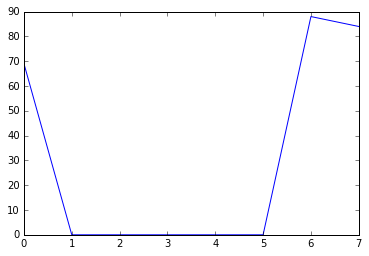

In [507]:
data = status_reqs['BODY'].map(lambda x: x.decode('hex'))
test_byte = data.map(lambda x: ord(x[1]))

def binary_repr(x):
    return np.binary_repr(x,width=8) + " (0x%02x)" % x

def byte_bit_stats(data):
    bit_flips = np.bitwise_xor(test_byte.astype(np.uint8), test_byte.shift(-1).fillna(0).astype(np.uint8))
    return bit_flips.map(np.unpackbits).sum()

bit_stats = byte_bit_stats(test_byte)
print "Counts of bit flips: %s" % bit_stats
print "Unique values: %s" % test_byte.map(lambda x: "0x%02x" % x).unique()
print "Value counts: \n%s" % pd.Series(test_byte.map(binary_repr)).value_counts()

#test_byte.map(np.binary_repr)
#test_byte.hist(bins=255)
plt.plot(bit_stats)


# Decode status responses

In [389]:
status_resp = packets.loc[(packets['MTYPE'] == '1d18') | (packets['MTYPE'] == '1d28')]
status_resp = status_resp.loc[status_resp['BODY'].map(lambda x: len(x)) == 20]
status_resp.head()

,B9,BLEN,BODY,CON,CRC,ID1,ID2,MTYPE,PTYPE,SEQ
timestamp,,,,,,,,,,
2016-06-17 20:23:30.966899,28,10,02a82800002b7bff8134,NaN,45\n,1f014829,1f014829,1d18,POD,25
2016-06-17 20:24:44.634776,30,10,02a82800002b7fff0360,NaN,ea\n,1f014829,1f014829,1d18,POD,28
2016-06-17 20:25:53.328967,38,10,02a8a800002b87ff037c,NaN,f2\n,1f014829,1f014829,1d18,POD,31
2016-06-17 20:48:44.551830,00,10,02ad2800002bdfff009c,NaN,df\n,1f014829,1f014829,1d18,POD,02
2016-06-17 20:48:47.828112,08,10,02ad2800002bdfff83c5,NaN,cf\n,1f014829,1f014829,1d18,POD,05


In [390]:
data = status_resp['BODY'].map(lambda x: x.decode('hex'))
test_byte = data.map(lambda x: ord(x[1]) * 5)
test_byte

timestamp
2016-06-17 20:23:30.966899    840
2016-06-17 20:24:44.634776    840
2016-06-17 20:25:53.328967    840
2016-06-17 20:48:44.551830    865
2016-06-17 20:48:47.828112    865
2016-06-17 20:48:49.688761    865
2016-06-17 20:48:51.428896    865
2016-06-17 20:50:34.882742    865
2016-06-17 20:58:18.403560    875
2016-06-17 20:58:20.538105    875
2016-06-17 20:58:22.164038    875
2016-06-17 20:58:23.777299    875
2016-06-17 20:58:25.291832    875
2016-06-17 20:58:26.899218    875
2016-06-17 20:58:28.411477    875
2016-06-17 20:58:30.012161    875
2016-06-26 20:33:13.816744    140
2016-06-26 20:33:28.755065    140
2016-06-26 20:34:22.870609    145
2016-06-26 20:35:08.851210    145
2016-06-26 20:37:19.478842    145
2016-06-26 20:37:52.259721    145
2016-06-26 20:38:49.309338    150
2016-06-26 20:39:52.689962    150
2016-06-26 20:40:37.139551    150
2016-06-26 20:41:44.360491    150
2016-06-26 20:42:31.338083    150
2016-06-26 20:42:56.214012    150
2016-06-26 20:44:28.422896    155
2016

TypeError: Empty 'DataFrame': no numeric data to plot

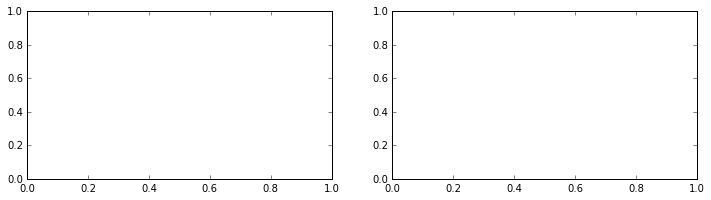

In [391]:
data = status_reqs['BODY'].map(lambda x: x.decode('hex'))
fig, axes = plt.subplots(1, 2, figsize=(12, 3));
v = data.map(lambda x: ord(x[1]) << 8) + data.map(lambda x: ord(x[2]))
p1 = v.plot(subplots=True, ax=axes[0], rot=45)
v = data.map(lambda x: ord(x[5]) << 8) + data.map(lambda x: ord(x[6]))
p2 = v.plot(subplots=True, ax=axes[1], rot=45)